<a href="https://colab.research.google.com/github/ali7amie/Air-cargo-traffic/blob/main/AWB_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#old

In [ ]:

#https://towardsdatascience.com/generating-fake-data-with-pandas-very-quickly-b99467d4c618

import pandas as pd
import numpy as np
from itertools import cycle
def generate_fake_dataframe(size, cols, col_names = None, intervals = None, seed = None):
    #'''(Airline Code,'IATA Designator','Name')'''
    categories_dict = {'carrier': [('057','AF','Air France'), ('072','GF','Gulf Air'), ('074','KL','KLM Cargo'), ('076','ME','Middle East Airlines'),('077','MS','Egypt Air'), ('080','LO','LOT Polish Airlines'), ('096','IR','Iran Air'), ('125','BA','British Airways'), ('157','QR','Qatar Airways'), ('172','CV','Cargolux Airlines'), ('176','EK','Emirates'), ('229','KU','Kuwait Airways'), ('235','TK','Turkish Airlines'), ('390','A3','Aegean Airlines'),('423', 'ER',	'DHL Aviation/DHL Airways'), ('507','SU','Aeroflot'), ('512', 'RJ', 'Royal Jordanian'), ('607','EY','Etihad Airways'), ('615', 'QY', 'DHL Aviation / European Air Transport'), ('624', 'PC', 'Pegasus airlines'), ('635','IY','Yemenia Yemen Airways')], 
                       'animals': ['cow', 'rabbit', 'duck', 'shrimp', 'pig', 'goat', 'crab', 'deer', 'bee', 'sheep', 'fish', 'turkey', 'dove', 'chicken', 'horse'],
                       'names'  : ['James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer', 'Michael', 'Linda', 'William', 'Elizabeth', 'Ahmed', 'Barbara', 'Richard', 'Susan', 'Salomon', 'Juan Luis'],
                       'cities' : ['Stockholm', 'Denver', 'Moscow', 'Marseille', 'Palermo', 'Tokyo', 'Lisbon', 'Oslo', 'Nairobi', 'Río de Janeiro', 'Berlin', 'Bogotá', 'Manila', 'Madrid', 'Milwaukee'],
                       'colors' : ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'pink', 'silver', 'gold', 'beige', 'brown', 'grey', 'black', 'white']
                      }
    default_intervals = {"i" : (0,10), "f" : (0,100), "c" : ("names", 5), "d" : ("2020-01-01","2020-12-31"), "AWB-SN": (0,9999999)}
    rng = np.random.default_rng(seed)

    first_c = default_intervals["c"][0]
    categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
    default_intervals["c"] = (categories_names, default_intervals["c"][1])
    
    if isinstance(col_names,list):
        assert len(col_names) == len(cols), f"The fake DataFrame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements"
    elif col_names is None:
        suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
        col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]

    if isinstance(intervals,list):
        assert len(intervals) == len(cols), f"The fake DataFrame should have {len(cols)} columns but intervals is a list with {len(intervals)} elements"
    else:
        if isinstance(intervals,dict):
            assert len(set(intervals.keys()) - set(default_intervals.keys())) == 0, f"The intervals parameter has invalid keys"
            default_intervals.update(intervals)
        intervals = [default_intervals[col] for col in cols]
    df = pd.DataFrame()
    for col, col_name, interval in zip(cols, col_names, intervals):
        if interval is None:
            interval = default_intervals[col]
        assert (len(interval) == 2 and isinstance(interval, tuple)) or isinstance(interval, list), f"This interval {interval} is neither a tuple of two elements nor a list of strings."
        if col in ("i","f","d"):
            start, end = interval
        if col == "i":
            df[col_name] = rng.integers(start, end, size)
        elif col == "f":
            df[col_name] = rng.uniform(start, end, size)
        elif col == "c":
            if isinstance(interval, list):
                categories = np.array(interval)
            else:
                cat_family, length = interval
                if isinstance(cat_family, cycle):
                    cat_family = next(cat_family)
                assert cat_family in categories_dict.keys(), f"There are no samples for category '{cat_family}'. Consider passing a list of samples or use one of the available categories: {categories_dict.keys()}"
                categories = rng.choice(categories_dict[cat_family], length, replace = False, shuffle = True)
            df[col_name] = rng.choice(categories, size, shuffle = True)
        elif col == "d":
            df[col_name] = rng.choice(pd.date_range(start, end), size)
    return df       


In [ ]:
#generate_fake_dataframe(10000, "cififficcdd")
generate_fake_dataframe(10000, "cifd")



,column_0_cat,column_1_int,column_2_float,column_3_date
0,Barbara,1,50.286546,2020-12-06
1,James,6,55.583506,2020-04-13
2,James,0,17.227337,2020-06-06
3,James,4,10.004402,2020-02-18
4,Linda,2,90.342295,2020-11-18
...,...,...,...,...
9995,Barbara,1,95.266958,2020-06-02
9996,James,1,70.635973,2020-09-06
9997,Salomon,4,91.009510,2020-09-05
9998,Barbara,7,96.821353,2020-05-21


In [ ]:
cols=10
seed=None
col_names=None
categories_dict = {'carrier': [('057','AF','Air France','49° 00′ 36″N','2° 32′ 55″E','CDG'), ('072','GF','Gulf Air','26°16′15″N', '50°38′01″E','BAH'), ('074','KL','KLM Cargo', '52°18′00″N', '4°45′54″E', 'AMS'), ('076','ME','Middle East Airlines', '33°49′16″N', '035°29′18″E','BEY'),('077','MS','Egypt Air', '30°07′19″N', '31°24′20″E', 'CAI'), ('080','LO','LOT Polish Airlines', '52°09′57″N', '20°58′02″E', 'WAW'), ('096','IR','Iran Air', '35°24′58″N', '051°09′08″E', 'IKA'), ('125','BA','British Airways','51°28′39″N', '000°27′41″W', 'LHR'), ('157','QR','Qatar Airways', '25°16′23″N', '51°36′29″E','DOH'), ('172','CV','Cargolux Airlines','49°37′24″N', '006°12′16″E', 'LUX'), ('176','EK','Emirates','25°15′10″N', '055°21′52″E', 'DXB'), ('229','KU','Kuwait Airways','29°13′36″N', '047°58′48″E', 'KWI'), ('235','TK','Turkish Airlines','41°15′44″N', '28°43′40″E', 'IST'), ('390','A3','Aegean Airlines','37°56′11″N', '23°56′50″E', 'ATH'),('423', 'ER',	'DHL Aviation/DHL Airways','45°37′48″N', '8°43′23″E','MXP'), ('507','SU','Aeroflot','55°58′22″N', '37°24′53″E','SVO'), ('512', 'RJ', 'Royal Jordanian','31°43′21″N', '35°59′36″E','AMM'), ('607','EY','Etihad Airways','24°25′59″N', '054°39′04″E','AUH'), ('615', 'QY', 'DHL Aviation / European Air Transport','51°25′26″N', '012°14′11″E','LEJ'), ('624', 'PC', 'Pegasus airlines','40°53′54″N', '29°18′33″E','SAW'), ('635','IY','Yemenia Yemen Airways','12°49′46″N', '045°01′44″E','ADE')], 
                       'animals': ['cow', 'rabbit', 'duck', 'shrimp', 'pig', 'goat', 'crab', 'deer', 'bee', 'sheep', 'fish', 'turkey', 'dove', 'chicken', 'horse'],
                       'names'  : ['James', 'Mary', 'Robert', 'Patricia', 'John', 'Jennifer', 'Michael', 'Linda', 'William', 'Elizabeth', 'Ahmed', 'Barbara', 'Richard', 'Susan', 'Salomon', 'Juan Luis'],
                       'cities' : ['Stockholm', 'Denver', 'Moscow', 'Marseille', 'Palermo', 'Tokyo', 'Lisbon', 'Oslo', 'Nairobi', 'Río de Janeiro', 'Berlin', 'Bogotá', 'Manila', 'Madrid', 'Milwaukee'],
                       'colors' : ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple', 'pink', 'silver', 'gold', 'beige', 'brown', 'grey', 'black', 'white']
                      }
default_intervals = {"i" : (0,10), "f" : (0,100), "c" : ("names", 5), "d" : ("2020-01-01","2020-12-31"), "AWB-SN": (0,9999999)}
rng = np.random.default_rng(seed)

first_c = default_intervals["c"][0]
categories_names = cycle([first_c] + [c for c in categories_dict.keys() if c != first_c])
default_intervals["c"] = (categories_names, default_intervals["c"][1])

    
if isinstance(col_names,list):
    assert len(col_names) == len(cols), f"The fake DataFrame should have {len(cols)} columns but col_names is a list with {len(col_names)} elements"
elif col_names is None:
    suffix = {"c" : "cat", "i" : "int", "f" : "float", "d" : "date"}
    col_names = [f"column_{str(i)}_{suffix.get(col)}" for i, col in enumerate(cols)]


TypeError: ignored

# New

In [ ]:
import pandas as pd
!pip install dms2dec
from dms2dec.dms_convert import dms2dec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

import numpy as np

#dms2dec(Airlines[:,3][0]) # converts to dec
#dms2dec('''3° 2'33.53"E''') # converts to dec

#DMS coordinate

data=pd.DataFrame(columns=['AWB prefix', 'AWB no', 'Shipper', 'Consignee', 'Airport of Departure','Dep Lat','Dep Lon', 'Airport of Destination', 'Des Lat', 'Des Lon', 'Connection Airport','Con Lat', 'Con Lon', 'Departure Date', 'Destination Date', 'Number of Packages', 'Chargeable Weight', 'Nature of goods' ])

Airlines=np.array([('047','TP','TAP Air Portugal','38°46′27″N', '009°08′03″W','LIS'),('057','AF','Air France','49°00′36″N','2°32′55″E','CDG'), ('065','SV','Saudi Arabian Airlines','21°40′46″N',' 039°09′24″E','JED'),('071','ET','Ethiopian Airlines','08°58′40″N',' 38°47′58″E','ADD'), ('072','GF','Gulf Air','26°16′15″N', '50°38′01″E','BAH'), ('074','KL','KLM Cargo', '52°18′00″N', '4°45′54″E', 'AMS'),('075','IB','Iberia Airline', '40°28′20″N', '003°33′39″W', 'MAD'), ('076','ME','Middle East Airlines', '33°49′16″N', '035°29′18″E','BEY'),('077','MS','Egypt Air', '30°07′19″N', '31°24′20″E', 'CAI'), ('080','LO','LOT Polish Airlines', '52°09′57″N', '20°58′02″E', 'WAW'), ('096','IR','Iran Air', '35°24′58″N', '051°09′08″E', 'IKA'), ('125','BA','British Airways','51°28′39″N', '000°27′41″W', 'LHR'), ('147','AT','Royal Air Maroc','33°22′02″N', '007°35′23″W', 'CMN'), ('157','QR','Qatar Airways', '25°16′23″N', '51°36′29″E','DOH'), ('172','CV','Cargolux Airlines','49°37′24″N', '006°12′16″E', 'LUX'), ('176','EK','Emirates','25°15′10″N', '055°21′52″E', 'DXB'), ('220','LH','Lufthansa','50°02′00″N', '008°34′14″E','FRA'),('229','KU','Kuwait Airways','29°13′36″N', '047°58′48″E', 'KWI'), ('235','TK','Turkish Airlines','41°15′44″N', '28°43′40″E', 'IST'), ('390','A3','Aegean Airlines','37°56′11″N', '23°56′50″E', 'ATH'),('423', 'ER',	'DHL Aviation/DHL Airways','45°37′48″N', '8°43′23″E','MXP'), ('507','SU','Aeroflot','55°58′22″N', '37°24′53″E','SVO'), ('512', 'RJ', 'Royal Jordanian','31°43′21″N', '35°59′36″E','AMM'), ('607','EY','Etihad Airways','24°25′59″N', '054°39′04″E','AUH'), ('615', 'QY', 'DHL Aviation / European Air Transport','51°25′26″N', '012°14′11″E','LEJ'), ('624', 'PC', 'Pegasus airlines','40°53′54″N', '29°18′33″E','SAW'), ('635','IY','Yemenia Yemen Airways','12°49′46″N', '045°01′44″E','ADE')])

dates=pd.date_range(start="2022-10-01",end="2022-10-30")

goods=np.array(['pharmaceutical raw material','fabrics','medical equipment','medicine','textile','clothes','mobile accessories','cosmetics','vaccines','flowers','CONSOLIDATED CARGO MANIFEST','laboratory reagents','human remains','magazines','personal effects','CONSOLIDATED CARGO MANIFEST','spare parts','Fragrances'])

dim=50
for i in range(0,dim):
    j=np.random.randint(0,len(Airlines))
    k=np.random.randint(0,len(Airlines))
    l=np.random.randint(0,len(Airlines))
    m=np.random.randint(0,len(dates)-3)
    n=np.random.randint(1,100)
    o=np.random.randint(1,5)
    p=[n,o][np.random.randint(0,1)]
    q=np.random.randint(0,len(goods))


    new_row = { 'AWB prefix': Airlines[j][0],
               'AWB no':np.random.randint(10000000,99999999),
               #'Shipper',
               #'Consignee',
               'Airport of Departure':Airlines[:,5][k],               
               'Dep Lat': Airlines[k][3],
               'Dep Lon': Airlines[k][4],
               'Airport of Destination': Airlines[:,5][l],
               'Des Lat': Airlines[l][3],
               'Des Lon': Airlines[k][4] ,
               'Connection Airport':Airlines[j][5],
               'Con Lat': Airlines[j][3],
               'Con Lon': Airlines[j][4],
               'Departure Date': dates[m],
               'Destination Date': dates[m+np.random.randint(0,2)],
               'Number of Packages': p ,
               'Chargeable Weight': 15*p if p==n else 70*p,
               'Nature of goods': goods[q]
                }

    data=data.append(new_row, ignore_index=True )               

In [ ]:
Airports=pd.DataFrame(Airlines[:,[3,4,5]],columns=['Lat','Lon','Name'])
Airports['Lon'] = Airports['Lon'].apply(dms2dec)
Airports['Lat'] = Airports['Lat'].apply(dms2dec)

In [ ]:
Airports

,Lat,Lon,Name
0,49.010000,2.548611,CDG
1,26.270833,50.633611,BAH
2,52.300000,4.765000,AMS
3,33.821111,35.488333,BEY
4,30.121944,31.405556,CAI
5,52.165833,20.967222,WAW
6,35.416111,51.152222,IKA
7,51.477500,-0.461389,LHR
8,25.273056,51.608056,DOH
9,49.623333,6.204444,LUX


In [ ]:
data['Dep Lat'] = data['Dep Lat'].apply(dms2dec)
data['Dep Lon'] = data['Dep Lon'].apply(dms2dec)
data['Des Lat'] = data['Des Lat'].apply(dms2dec)
data['Des Lon'] = data[ 'Des Lon'].apply(dms2dec)
data['Con Lat'] = data[ 'Con Lat'].apply(dms2dec)
data['Con Lon'] = data[ 'Con Lon'].apply(dms2dec)



In [ ]:
data

,AWB prefix,AWB no,Shipper,Consignee,Airport of Departure,Dep Lat,Dep Lon,Airport of Destination,Des Lat,Des Lon,Connection Airport,Con Lat,Con Lon,Departure Date,Destination Date,Number of Packages,Chargeable Weight,Nature of goods
0,615,78552070,NaN,NaN,LIS,38.774167,-9.134167,MXP,45.630000,-9.134167,LEJ,51.423889,12.236389,2022-10-27,2022-10-27,8,120,laboratory reagents
1,635,53503601,NaN,NaN,WAW,52.165833,20.967222,CDG,49.010000,20.967222,ADE,12.829444,45.028889,2022-10-04,2022-10-05,3,45,mobile accessories
2,076,16278880,NaN,NaN,IST,41.262222,28.727778,BEY,33.821111,28.727778,BEY,33.821111,35.488333,2022-10-01,2022-10-02,92,1380,CONSOLIDATED CARGO MANIFEST
3,057,47646102,NaN,NaN,CDG,49.010000,2.548611,LHR,51.477500,2.548611,CDG,49.010000,2.548611,2022-10-14,2022-10-15,96,1440,vaccines
4,220,17705762,NaN,NaN,LEJ,51.423889,12.236389,SAW,40.898333,12.236389,FRA,50.033333,8.570556,2022-10-02,2022-10-03,55,825,clothes
5,096,47234563,NaN,NaN,LHR,51.477500,-0.461389,BAH,26.270833,-0.461389,IKA,35.416111,51.152222,2022-10-25,2022-10-25,18,270,Fragrances
6,607,60491258,NaN,NaN,KWI,29.226667,47.980000,LHR,51.477500,47.980000,AUH,24.433056,54.651111,2022-10-21,2022-10-21,25,375,personal effects
7,076,72420526,NaN,NaN,LHR,51.477500,-0.461389,ATH,37.936389,-0.461389,BEY,33.821111,35.488333,2022-10-03,2022-10-04,94,1410,mobile accessories
8,072,15520984,NaN,NaN,AMS,52.300000,4.765000,ADD,8.977778,4.765000,BAH,26.270833,50.633611,2022-10-05,2022-10-05,80,1200,vaccines
9,235,33140902,NaN,NaN,BAH,26.270833,50.633611,IKA,35.416111,50.633611,IST,41.262222,28.727778,2022-10-19,2022-10-19,56,840,medicine


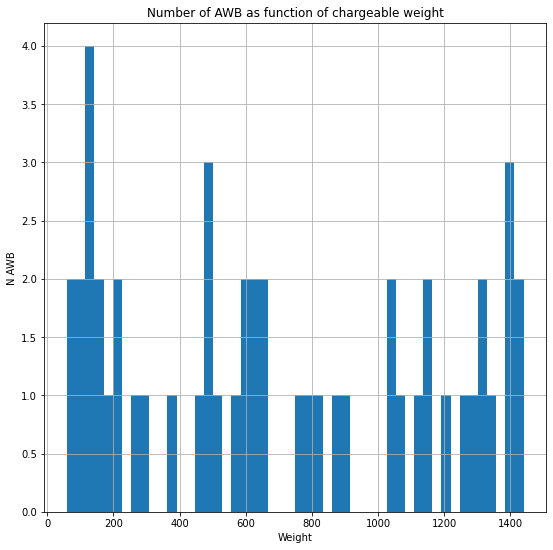

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.title('Number of AWB as function of chargeable weight')
plt.xlabel('Weight')
plt.ylabel('N AWB')
data['Chargeable Weight'].hist(bins=len(data['Chargeable Weight']))
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

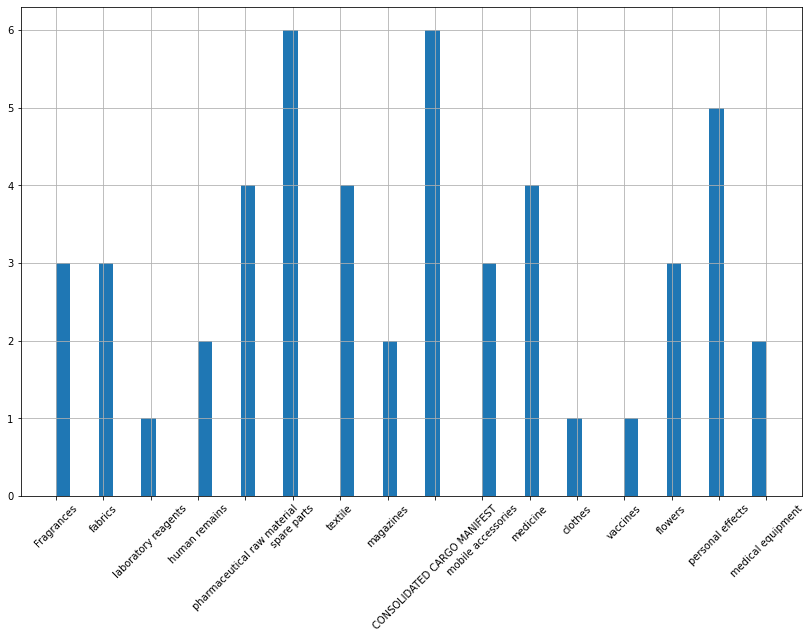

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,9))
data['Nature of goods'].hist(bins=len(data['Nature of goods']))
plt.xticks(rotation = 45)

#Plotting on map

In [ ]:
!pip install geopandas
!pip install dms2dec


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
data['coordinate']=list(zip(data['Con Lon'],data['Con Lat']))
data['coordinate']=data['coordinate'].apply(Point)
gdata = gpd.GeoDataFrame(data, geometry='coordinate')
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

In [ ]:
gdata

,AWB prefix,AWB no,Shipper,Consignee,Airport of Departure,Dep Lat,Dep Lon,Airport of Destination,Des Lat,Des Lon,Connection Airport,Con Lat,Con Lon,Departure Date,Destination Date,Number of Packages,Chargeable Weight,Nature of goods,coordinate
0,624,62368674,NaN,NaN,SVO,55.972778,37.414722,DOH,25.273056,37.414722,SAW,40.898333,29.309167,2022-10-21,2022-10-21,88,1320,Fragrances,POINT (29.30917 40.89833)
1,235,59463079,NaN,NaN,KWI,29.226667,47.980000,IKA,35.416111,47.980000,IST,41.262222,28.727778,2022-10-12,2022-10-12,6,90,fabrics,POINT (28.72778 41.26222)
2,057,37590395,NaN,NaN,IKA,35.416111,51.152222,CAI,30.121944,51.152222,CDG,49.010000,2.548611,2022-10-04,2022-10-04,94,1410,laboratory reagents,POINT (2.54861 49.01000)
3,057,91598928,NaN,NaN,SAW,40.898333,29.309167,ADE,12.829444,29.309167,CDG,49.010000,2.548611,2022-10-18,2022-10-19,33,495,human remains,POINT (2.54861 49.01000)
4,076,10079677,NaN,NaN,ATH,37.936389,23.947222,AMS,52.300000,23.947222,BEY,33.821111,35.488333,2022-10-08,2022-10-08,61,915,pharmaceutical raw material,POINT (35.48833 33.82111)
5,624,10193170,NaN,NaN,CDG,49.010000,2.548611,CAI,30.121944,2.548611,SAW,40.898333,29.309167,2022-10-01,2022-10-01,14,210,spare parts,POINT (29.30917 40.89833)
6,615,20735371,NaN,NaN,DXB,25.252778,55.364444,CAI,30.121944,55.364444,LEJ,51.423889,12.236389,2022-10-13,2022-10-13,42,630,textile,POINT (12.23639 51.42389)
7,615,71448643,NaN,NaN,BAH,26.270833,50.633611,IKA,35.416111,50.633611,LEJ,51.423889,12.236389,2022-10-21,2022-10-22,38,570,magazines,POINT (12.23639 51.42389)
8,125,48364110,NaN,NaN,BEY,33.821111,35.488333,AUH,24.433056,35.488333,LHR,51.477500,-0.461389,2022-10-02,2022-10-02,88,1320,CONSOLIDATED CARGO MANIFEST,POINT (-0.46139 51.47750)
9,077,56882205,NaN,NaN,SVO,55.972778,37.414722,IKA,35.416111,37.414722,CAI,30.121944,31.405556,2022-10-25,2022-10-25,9,135,mobile accessories,POINT (31.40556 30.12194)


In [ ]:
world

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
SRB,7111024,Europe,Serbia,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
MNE,642550,Europe,Montenegro,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
-99,1895250,Europe,Kosovo,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


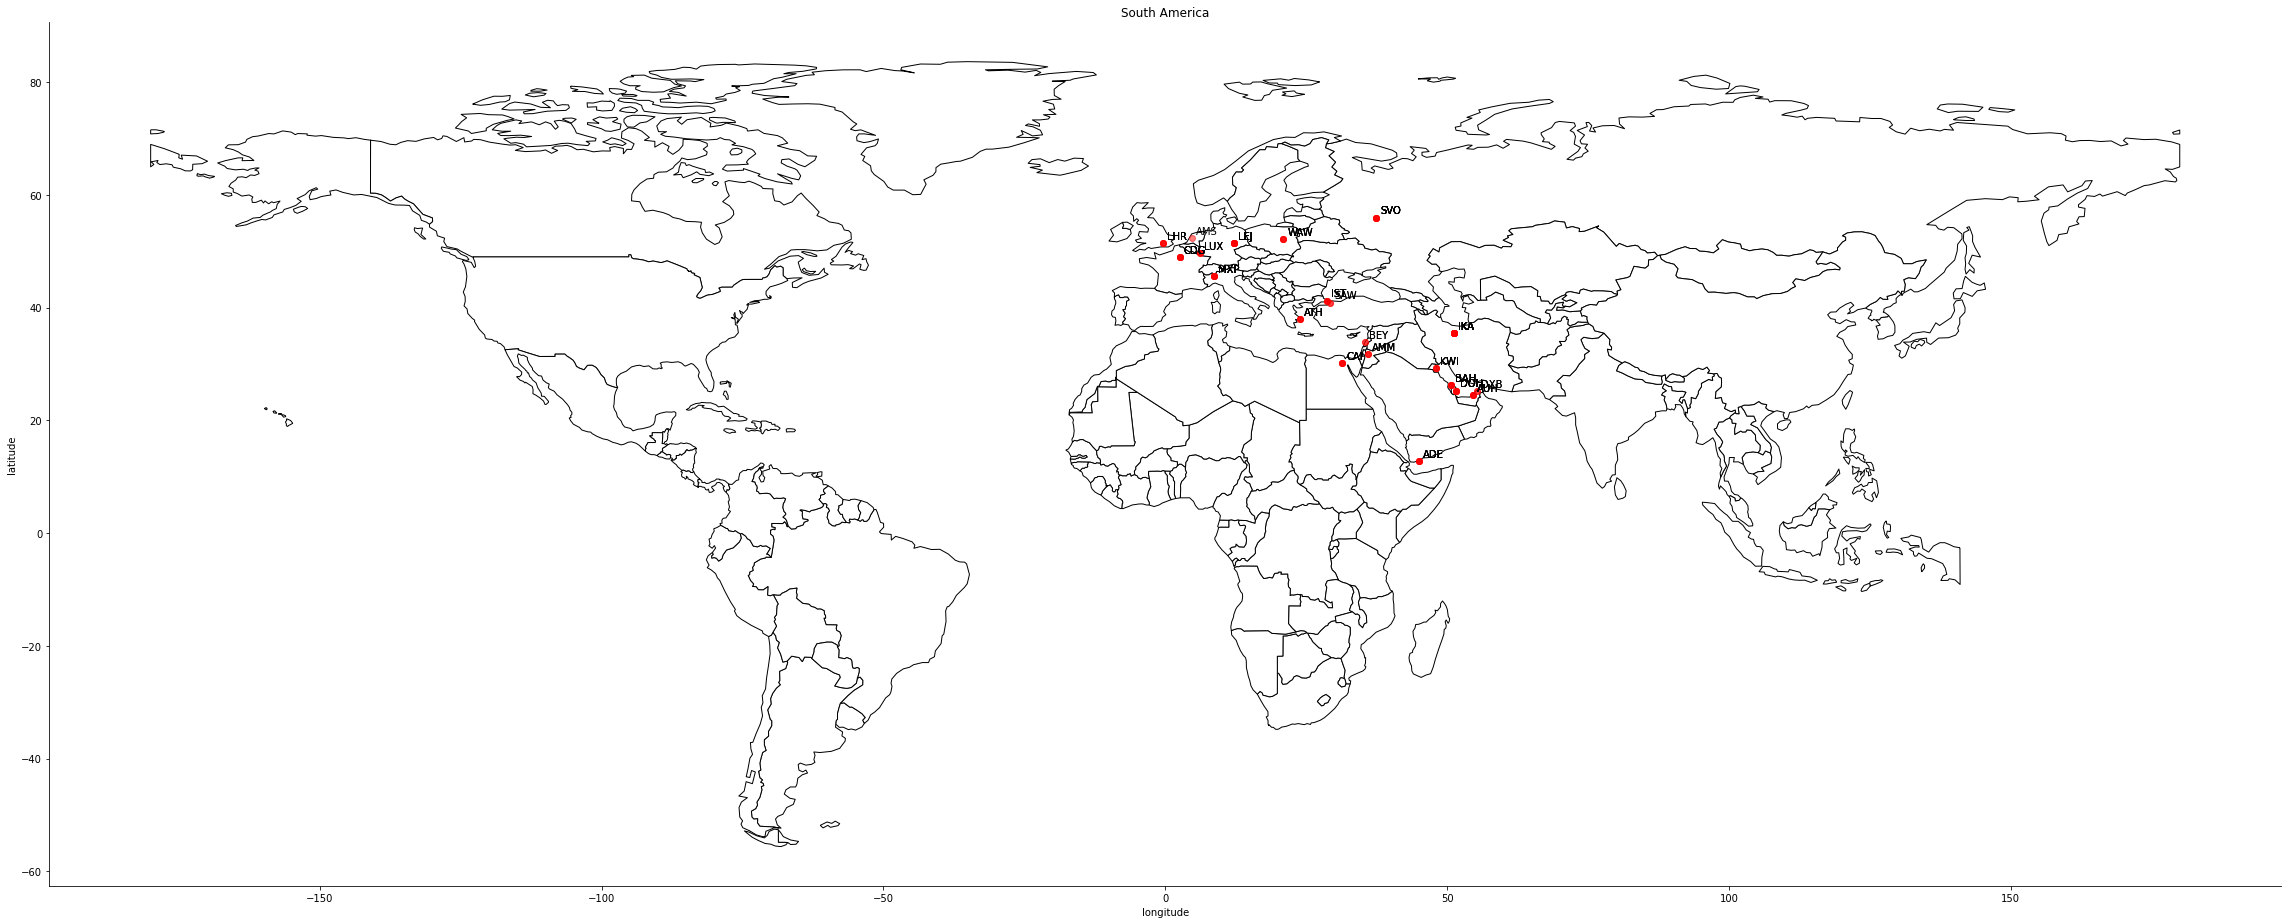

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(40,40))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'Europe'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'Asia'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'Africa'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='white')


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gdata.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gdata['coordinate'].x, gdata['coordinate'].y, gdata['Connection Airport']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

In [ ]:
#graph-tool
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard




Executing: /tmp/apt-key-gpghome.LeSXqlJhq8/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [985 kB]
Get:9 http://archive.ubuntu.com/u

In [ ]:
Airports
Airports = Airports.assign(Lon_graph=Airports['Lon']+180)
Airports = Airports.assign(Lat_graph=Airports['Lat']+60)



In [ ]:
Airports

,Lat,Lon,Name
0,49.010000,2.548611,CDG
1,26.270833,50.633611,BAH
2,52.300000,4.765000,AMS
3,33.821111,35.488333,BEY
4,30.121944,31.405556,CAI
5,52.165833,20.967222,WAW
6,35.416111,51.152222,IKA
7,51.477500,-0.461389,LHR
8,25.273056,51.608056,DOH
9,49.623333,6.204444,LUX


In [ ]:
Airports[['Lon','Lat']]

,Lon,Lat
0,0.009995,0.192196
1,0.198563,0.103023
2,0.018686,0.205098
3,0.139170,0.132632
4,0.123159,0.118125
5,0.082224,0.204572
6,0.200597,0.138887
7,-0.001809,0.201873
8,0.202385,0.099110
9,0.024331,0.194601


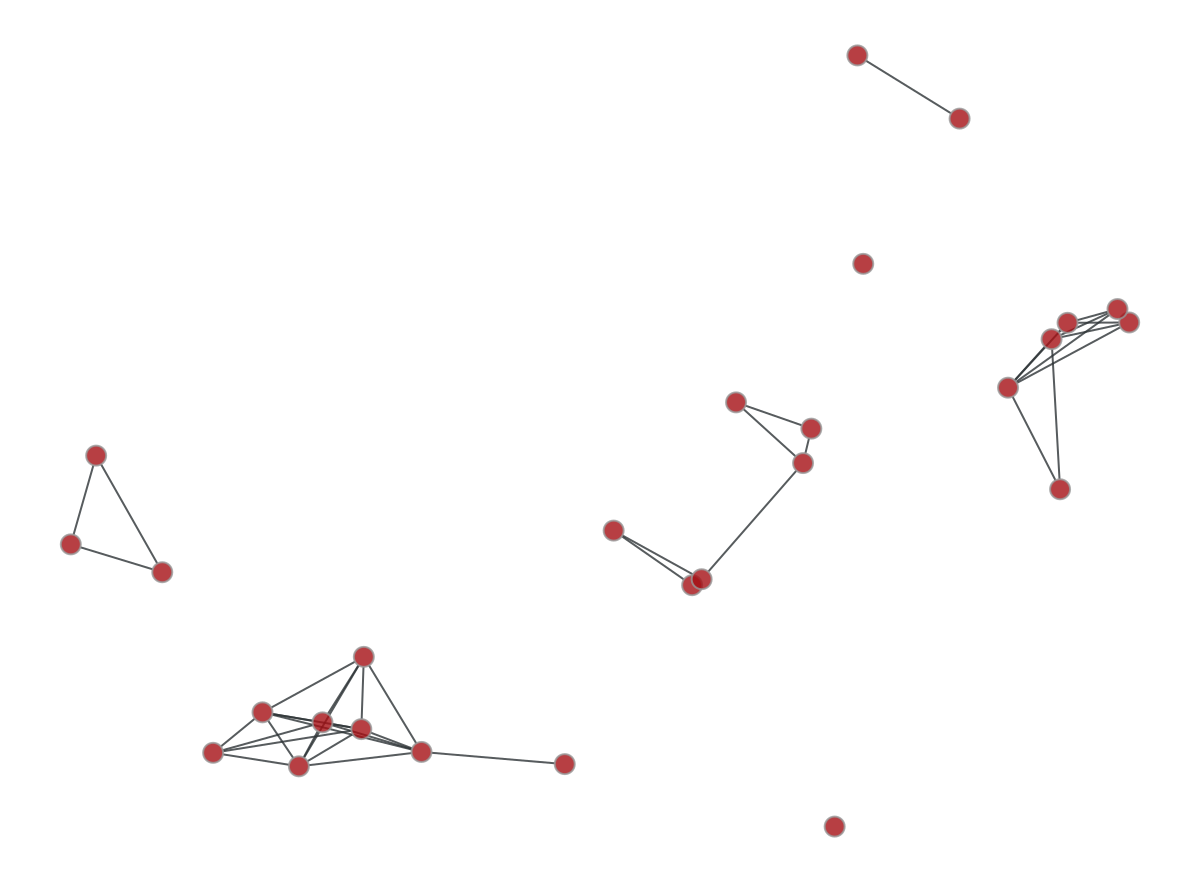

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fec2c53d390, at 0x7fec2c53d710>

In [ ]:
from graph_tool.all import *
#g = Graph()
#g.add_vertex(len(Airports))
#plt.switch_backend("cairo")

g, pos = geometric_graph(Airports[['Lon','Lat']], 10)  
graph_draw(g, pos=pos, vertex_size=10)

In [ ]:
#Names=g.new_vertex_property('string')
Namess=np.zeros(len(Airports),dtype=object)
for i in range(0,len(Airports)):
    #Names[i]=Airports['Name'][i]
    Namess[i]=Airports['Name'][i]



In [ ]:
for i in range(0,len(data)):
    g.add_edge(g.vertex(np.where(Namess==data['Airport of Departure'][i])[0][0]),g.vertex(np.where(Namess==data['Connection Airport'][i])[0][0]))
    g.add_edge(g.vertex(np.where(Namess==data['Connection Airport'][i])[0][0]),g.vertex(np.where(Namess==data['Airport of Destination'][i])[0][0]))

In [ ]:
g.set_directed(True)

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa51f47d750, at 0x7fa5305431d0>

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:634: UserWarning: Unknown parameter: alpha
  warnings.warn("Unknown parameter: " + k, UserWarning)


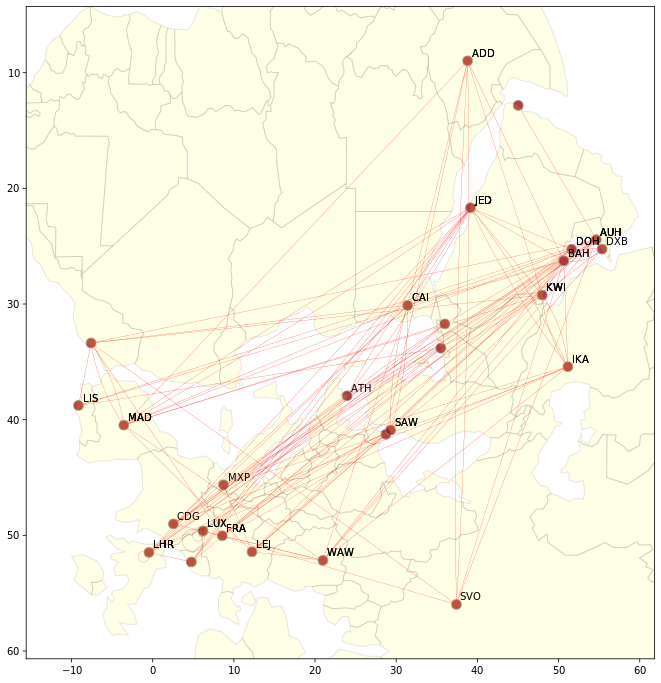

In [ ]:


plt.switch_backend("cairo")


fig, gax = plt.subplots(figsize=(12,12))

#gax.set_ylim(-60, 60)
#gax.set_xlim(-180, 180)

# Label the cities
for x, y, label in zip(gdata['coordinate'].x, gdata['coordinate'].y, gdata['Connection Airport']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

#gax.set_facecolor("blue")

world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='yellow',alpha=0.1)
world.query("continent == 'Europe'").plot(ax = gax, edgecolor='black', color='yellow',alpha=0.1)
world.query("continent == 'Asia'").plot(ax = gax, edgecolor='black', color='yellow',alpha=0.1)
world.query("continent == 'Africa'").plot(ax = gax, edgecolor='black', color='yellow',alpha=0.1)
world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='yellow',alpha=0.1)
graph_draw(g, pos=pos, vertex_size=1, mplfig=gax,edge_pen_width=0.02,edge_color='red',alpha=0.1,edge_end_marker='arrow')
#gax.invert_yaxis()



In [ ]:
Airports

,Lat,Lon,Name,Lon_graph,Lat_graph
0,38.774167,-9.134167,LIS,170.865833,98.774167
1,49.010000,2.548611,CDG,182.548611,109.010000
2,21.679444,39.156667,JED,219.156667,81.679444
3,8.977778,38.799444,ADD,218.799444,68.977778
4,26.270833,50.633611,BAH,230.633611,86.270833
5,52.300000,4.765000,AMS,184.765000,112.300000
6,40.472222,-3.560833,MAD,176.439167,100.472222
7,33.821111,35.488333,BEY,215.488333,93.821111
8,30.121944,31.405556,CAI,211.405556,90.121944
9,52.165833,20.967222,WAW,200.967222,112.165833


# Airport, direction degree hisogram

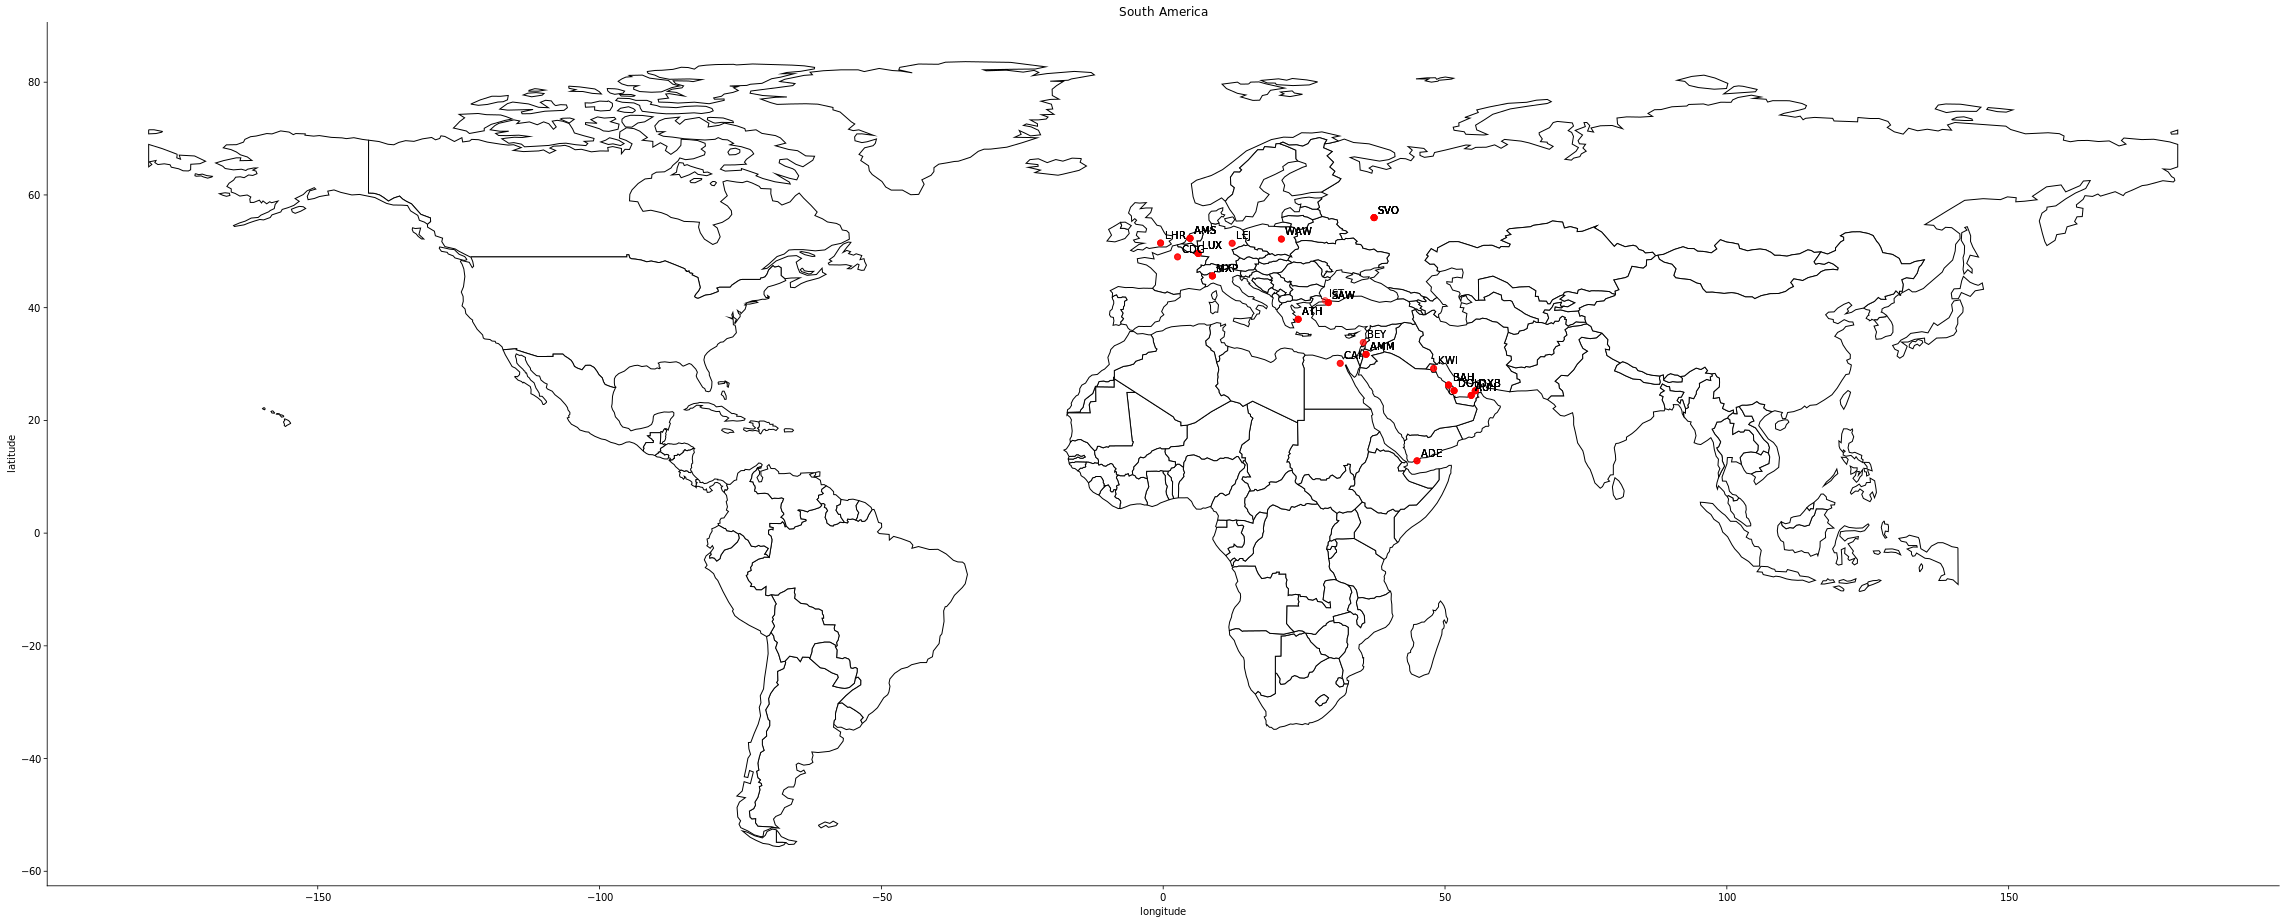

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we add a command to plot the cities
fig, gax = plt.subplots(figsize=(40,40))

# By only plotting rows in which the continent is 'South America' we only plot, well, South America.
world.query("continent == 'South America'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'Europe'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'Asia'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'Africa'").plot(ax = gax, edgecolor='black', color='white')
world.query("continent == 'North America'").plot(ax = gax, edgecolor='black', color='white')


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame. I want the
# cities as pale red dots.
gdata.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('South America')

# Kill the spines...
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

# ...or get rid of all the axis. Is it important to know the lat and long?
# plt.axis('off')


# Label the cities
for x, y, label in zip(gdata['coordinate'].x, gdata['coordinate'].y, gdata['Connection Airport']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

In [ ]:
!pip install conda
!conda install -c conda-forge proj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 299 kB 7.4 MB/s 
     |████████████████████████████████| 66 kB 6.0 MB/s 
     |████████████████████████████████| 109 kB 65.1 MB/s 
     |████████████████████████████████| 546 kB 72.4 MB/s 
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336960 sha256=bfa08336f38130698b254d41d995f89494ad9dfe1efd2f84f52d1b3b1b843adf
  Stored in directory: /root/.cache/pip/wheels/66/ec/2c/cce33d7a071720882d948fd3364d3ff5562bac9e5638768d41
  Created wheel for pycosat: filename=pycosat-0.6.3-cp37-cp37m-linux_x86_64.whl size=143848 sha256=4a6c637a9ce6c93f9099183d85c441083ddccab55afd4831381f18e653fe5340
  Stored in directory: /root/.cache/pip/wheels/c8/29/0e/a226b7c5a4f24e246f25201c0b1fbf6fb8f19f9cce89b02c36
Successfully built conda pycosat
ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is n

In [ ]:
!conda install -c conda-forge proj-data


ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a standalone application, currently
supported install methods include the Anaconda installer and the miniconda
installer.  You can download the miniconda installer from
https://conda.io/miniconda.html.



In [ ]:
!pip install geos

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 400 kB 8.3 MB/s 


In [ ]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install mpl_toolkits
#from mpl_toolkits.basemap import Basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [ ]:
!conda install basemap

ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a standalone application, currently
supported install methods include the Anaconda installer and the miniconda
installer.  You can download the miniconda installer from
https://conda.io/miniconda.html.



In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 5.9 MB/s 
     |████████████████████████████████| 30.5 MB 1.5 MB/s 
     |████████████████████████████████| 46 kB 4.7 MB/s 


In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [ ]:
Airports

,Lat,Lon,Name,Lon_graph,Lat_graph
0,49.010000,2.548611,CDG,182.548611,109.010000
1,26.270833,50.633611,BAH,230.633611,86.270833
2,52.300000,4.765000,AMS,184.765000,112.300000
3,33.821111,35.488333,BEY,215.488333,93.821111
4,30.121944,31.405556,CAI,211.405556,90.121944
5,52.165833,20.967222,WAW,200.967222,112.165833
6,35.416111,51.152222,IKA,231.152222,95.416111
7,51.477500,-0.461389,LHR,179.538611,111.477500
8,25.273056,51.608056,DOH,231.608056,85.273056
9,49.623333,6.204444,LUX,186.204444,109.623333


In [ ]:
Airports['Lon_graph'][1]

230.63361111111112

In [ ]:
pos[0]

array([ 2.54861111, 49.01      ])

In [ ]:
Airports

TypeError: ignored

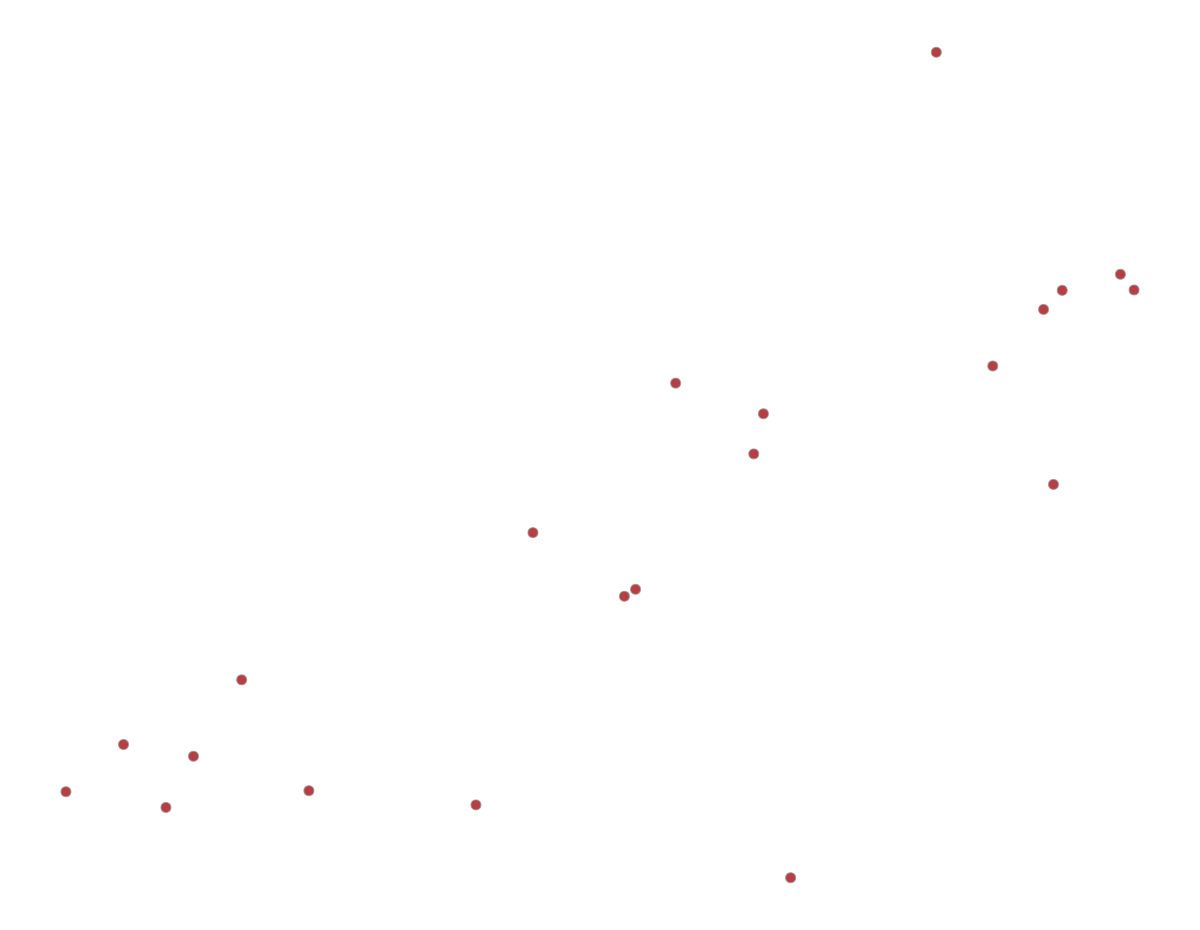

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa7fd4e0d10, at 0x7fa7fd4ee4d0>

In [ ]:
graph_draw(g, pos=pos, vertex_size=5)


In [ ]:
, edge_pen_width=0.1,edge_color='red'

In [ ]:
graph_draw(g, pos=pos, vertex_size=7, mplfig=gax)


<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa7fcd16d50, at 0x7fa7fce5d210>

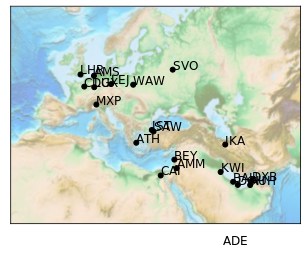

In [ ]:
#fig = plt.figure(figsize=(16, 16))
fig, gax = plt.subplots(figsize=(16,16))

plt.switch_backend("cairo")

m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=6E6, 
            lat_0=45, lon_0=30,)
m.etopo(scale=0.5, alpha=0.5)
graph_draw(g, pos=pos, vertex_size=7, mplfig=gax)

# Map (long, lat) to (x, y) for plotting
for i in range(0,len(Airports)):
    x, y = m(Airports['Lon'][i], Airports['Lat'][i])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, Airports['Name'][i], fontsize=12);

In [ ]:
plt.rcParams["figure.figsize"]


[6.0, 4.0]

#Last

In [ ]:

#!pip install geopandas
!pip install dms2dec
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 8.5 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.3 MB/s 
     |████████████████████████████████| 6.3 MB 37.0 MB/s 


In [ ]:
#graph-tool
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!apt install libcairo2-dev pkg-config python3-dev
!pip install --force-reinstall pycairo
!pip install zstandard


#!pip install geopandas
!pip install dms2dec
!pip install basemap

Executing: /tmp/apt-key-gpghome.GWC9i8qcCB/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://downloads.skewed.de/apt bionic InRelease [7,54

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import geopandas as gpd
#from shapely.geometry import Point
from mpl_toolkits.basemap import Basemap
from dms2dec.dms_convert import dms2dec
from graph_tool.all import *



data=pd.DataFrame(columns=['AWB prefix', 'AWB no', 'Shipper', 'Consignee', 'Airport of Departure','Dep Lat','Dep Lon', 'Airport of Destination', 'Des Lat', 'Des Lon', 'Connection Airport','Con Lat', 'Con Lon', 'Departure Date', 'Destination Date', 'Number of Packages', 'Chargeable Weight', 'Nature of goods' ])

Airlines=np.array([('057','AF','Air France','49°00′36″N','2°32′55″E','CDG'), ('072','GF','Gulf Air','26°16′15″N', '50°38′01″E','BAH'), ('074','KL','KLM Cargo', '52°18′00″N', '4°45′54″E', 'AMS'), ('076','ME','Middle East Airlines', '33°49′16″N', '035°29′18″E','BEY'),('077','MS','Egypt Air', '30°07′19″N', '31°24′20″E', 'CAI'), ('080','LO','LOT Polish Airlines', '52°09′57″N', '20°58′02″E', 'WAW'), ('096','IR','Iran Air', '35°24′58″N', '051°09′08″E', 'IKA'), ('125','BA','British Airways','51°28′39″N', '000°27′41″W', 'LHR'), ('157','QR','Qatar Airways', '25°16′23″N', '51°36′29″E','DOH'), ('172','CV','Cargolux Airlines','49°37′24″N', '006°12′16″E', 'LUX'), ('176','EK','Emirates','25°15′10″N', '055°21′52″E', 'DXB'), ('229','KU','Kuwait Airways','29°13′36″N', '047°58′48″E', 'KWI'), ('235','TK','Turkish Airlines','41°15′44″N', '28°43′40″E', 'IST'), ('390','A3','Aegean Airlines','37°56′11″N', '23°56′50″E', 'ATH'),('423', 'ER',	'DHL Aviation/DHL Airways','45°37′48″N', '8°43′23″E','MXP'), ('507','SU','Aeroflot','55°58′22″N', '37°24′53″E','SVO'), ('512', 'RJ', 'Royal Jordanian','31°43′21″N', '35°59′36″E','AMM'), ('607','EY','Etihad Airways','24°25′59″N', '054°39′04″E','AUH'), ('615', 'QY', 'DHL Aviation / European Air Transport','51°25′26″N', '012°14′11″E','LEJ'), ('624', 'PC', 'Pegasus airlines','40°53′54″N', '29°18′33″E','SAW'), ('635','IY','Yemenia Yemen Airways','12°49′46″N', '045°01′44″E','ADE')])

dates=pd.date_range(start="2022-10-01",end="2022-10-30")

goods=np.array(['pharmaceutical raw material','fabrics','medical equipment','medicine','textile','clothes','mobile accessories','cosmetics','vaccines','flowers','CONSOLIDATED CARGO MANIFEST','laboratory reagents','human remains','magazines','personal effects','CONSOLIDATED CARGO MANIFEST','spare parts','Fragrances'])

dim=100
for i in range(0,dim):
    j=np.random.randint(0,len(Airlines))
    k=np.random.randint(0,len(Airlines))
    l=np.random.randint(0,len(Airlines))
    m=np.random.randint(0,len(dates)-3)
    n=np.random.randint(1,100)
    o=np.random.randint(1,5)
    p=[n,o][np.random.randint(0,1)]
    q=np.random.randint(0,len(goods))


    new_row = { 'AWB prefix': Airlines[j][0],
               'AWB no':np.random.randint(10000000,99999999),
               #'Shipper',
               #'Consignee',
               'Airport of Departure':Airlines[:,5][k],               
               'Dep Lat': Airlines[k][3],
               'Dep Lon': Airlines[k][4],
               'Airport of Destination': Airlines[:,5][l],
               'Des Lat': Airlines[l][3],
               'Des Lon': Airlines[k][4] ,
               'Connection Airport':Airlines[j][5],
               'Con Lat': Airlines[j][3],
               'Con Lon': Airlines[j][4],
               'Departure Date': dates[m],
               'Destination Date': dates[m+np.random.randint(0,2)],
               'Number of Packages': p ,
               'Chargeable Weight': 15*p if p==n else 70*p,
               'Nature of goods': goods[q]
                }

    data=data.append(new_row, ignore_index=True )     

data['Dep Lat'] = data['Dep Lat'].apply(dms2dec)
data['Dep Lon'] = data['Dep Lon'].apply(dms2dec)
data['Des Lat'] = data['Des Lat'].apply(dms2dec)
data['Des Lon'] = data[ 'Des Lon'].apply(dms2dec)
data['Con Lat'] = data[ 'Con Lat'].apply(dms2dec)
data['Con Lon'] = data[ 'Con Lon'].apply(dms2dec)          

/usr/lib/python3/dist-packages/graph_tool/draw/cairo_draw.py:1500: RuntimeWarning: Error importing Gtk module: cannot import name '_gi' from 'gi' (/usr/lib/python3/dist-packages/gi/__init__.py); GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [ ]:
data

,AWB prefix,AWB no,Shipper,Consignee,Airport of Departure,Dep Lat,Dep Lon,Airport of Destination,Des Lat,Des Lon,Connection Airport,Con Lat,Con Lon,Departure Date,Destination Date,Number of Packages,Chargeable Weight,Nature of goods
0,176,14088520,NaN,NaN,KWI,29.226667,47.980000,AUH,24.433056,47.980000,DXB,25.252778,55.364444,2022-10-02,2022-10-03,92,1380,medical equipment
1,615,77442469,NaN,NaN,LEJ,51.423889,12.236389,IKA,35.416111,12.236389,LEJ,51.423889,12.236389,2022-10-03,2022-10-03,38,570,laboratory reagents
2,635,32628607,NaN,NaN,SAW,40.898333,29.309167,ATH,37.936389,29.309167,ADE,12.829444,45.028889,2022-10-16,2022-10-17,75,1125,vaccines
3,423,23551880,NaN,NaN,SAW,40.898333,29.309167,ATH,37.936389,29.309167,MXP,45.630000,8.723056,2022-10-21,2022-10-22,25,375,vaccines
4,096,65286161,NaN,NaN,DOH,25.273056,51.608056,MXP,45.630000,51.608056,IKA,35.416111,51.152222,2022-10-01,2022-10-02,92,1380,CONSOLIDATED CARGO MANIFEST
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,125,82625984,NaN,NaN,SAW,40.898333,29.309167,SVO,55.972778,29.309167,LHR,51.477500,-0.461389,2022-10-01,2022-10-01,90,1350,flowers
96,607,72985970,NaN,NaN,DOH,25.273056,51.608056,KWI,29.226667,51.608056,AUH,24.433056,54.651111,2022-10-22,2022-10-23,86,1290,vaccines
97,607,70996883,NaN,NaN,DXB,25.252778,55.364444,ATH,37.936389,55.364444,AUH,24.433056,54.651111,2022-10-11,2022-10-12,3,45,cosmetics
98,157,40499360,NaN,NaN,DOH,25.273056,51.608056,LEJ,51.423889,51.608056,DOH,25.273056,51.608056,2022-10-10,2022-10-10,93,1395,pharmaceutical raw material


In [ ]:
Airports=pd.DataFrame(Airlines[:,[3,4,5]],columns=['Lat','Lon','Name'])
Airports['Lon'] = Airports['Lon'].apply(dms2dec)
Airports['Lat'] = Airports['Lat'].apply(dms2dec)


In [ ]:
Airports

,Lat,Lon,Name
0,49.010000,2.548611,CDG
1,26.270833,50.633611,BAH
2,52.300000,4.765000,AMS
3,33.821111,35.488333,BEY
4,30.121944,31.405556,CAI
5,52.165833,20.967222,WAW
6,35.416111,51.152222,IKA
7,51.477500,-0.461389,LHR
8,25.273056,51.608056,DOH
9,49.623333,6.204444,LUX


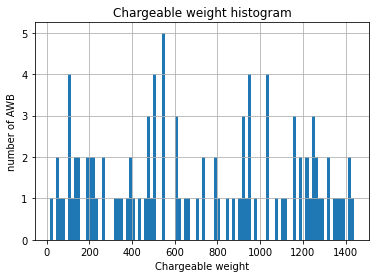

In [ ]:
plt.figure()
data['Chargeable Weight'].hist(bins=100)
plt.xlabel('Chargeable weight')
plt.ylabel('number of AWB')
plt.title('Chargeable weight histogram')
plt.show()


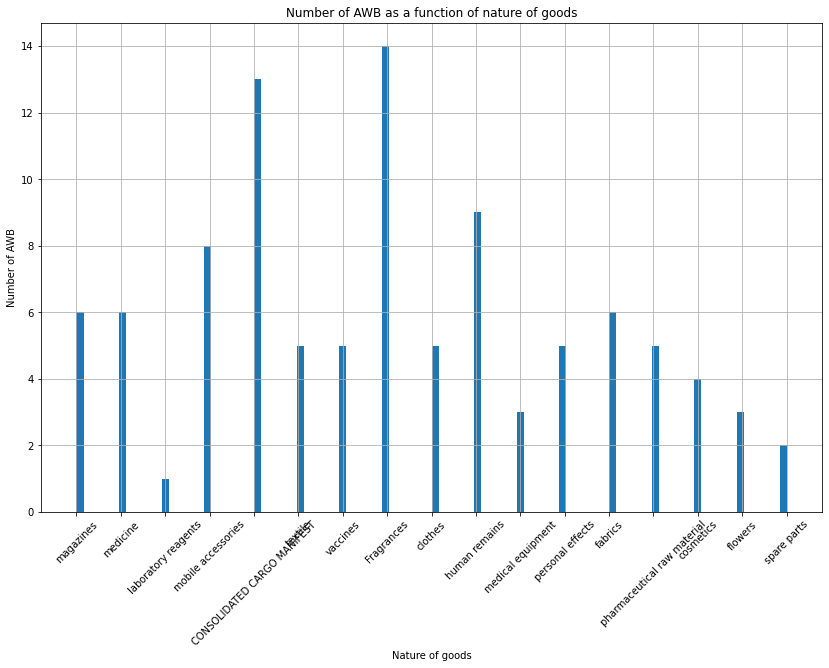

In [ ]:
plt.figure(figsize=(14,9))
plt.title('Number of AWB as a function of nature of goods')
data['Nature of goods'].hist(bins=len(data['Nature of goods']))
plt.xticks(rotation = 45)
plt.xlabel('Nature of goods')
plt.ylabel('Number of AWB')
plt.show()

In [ ]:
Airports[['Lon','Lat']]

,Lon,Lat
0,2.548611,49.010000
1,50.633611,26.270833
2,4.765000,52.300000
3,35.488333,33.821111
4,31.405556,30.121944
5,20.967222,52.165833
6,51.152222,35.416111
7,-0.461389,51.477500
8,51.608056,25.273056
9,6.204444,49.623333


In [ ]:
Airports['Lon']

0      2.548611
1     50.633611
2      4.765000
3     35.488333
4     31.405556
5     20.967222
6     51.152222
7     -0.461389
8     51.608056
9      6.204444
10    55.364444
11    47.980000
12    28.727778
13    23.947222
14     8.723056
15    37.414722
16    35.993333
17    54.651111
18    12.236389
19    29.309167
20    45.028889
Name: Lon, dtype: float64

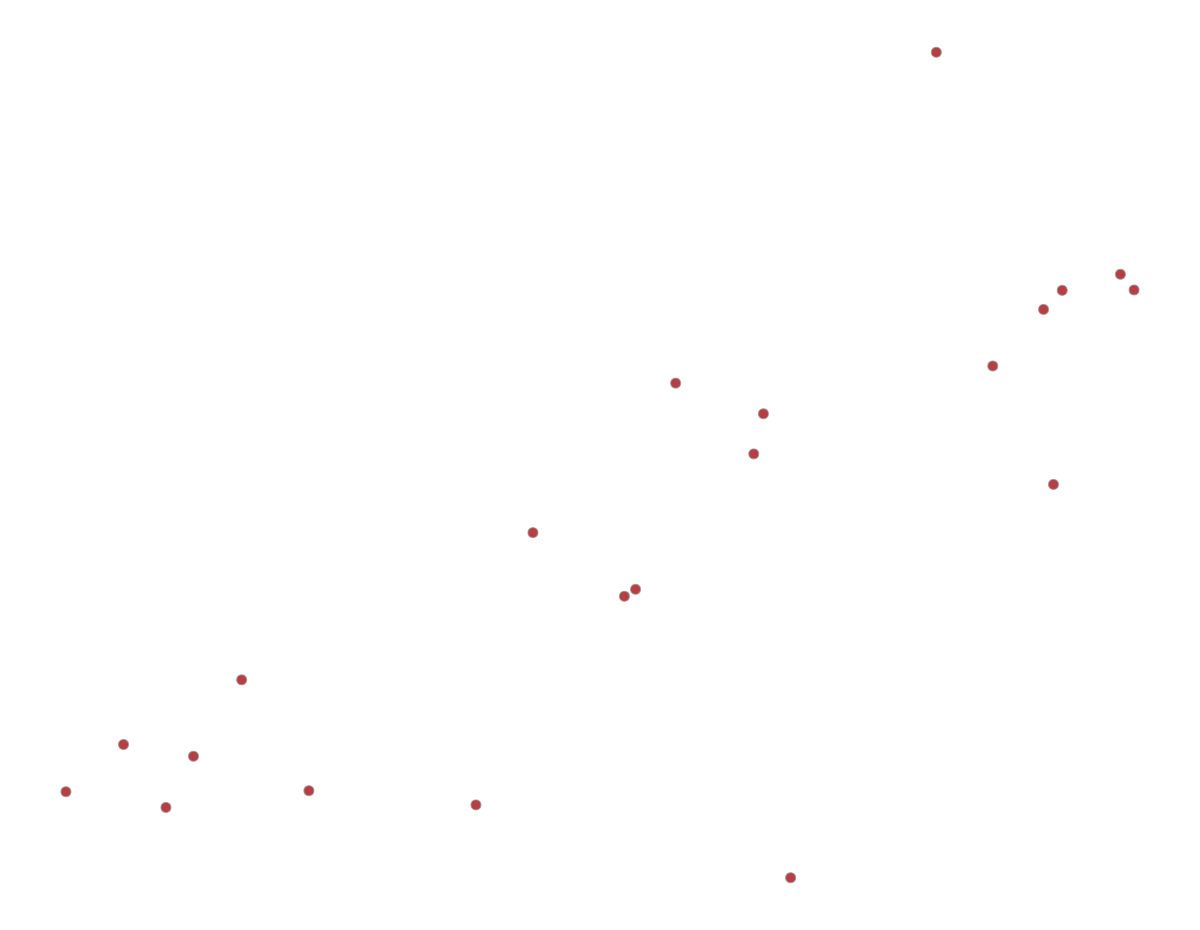

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa555d3cc10, at 0x7fa5562d9690>

In [ ]:
plt.switch_backend("cairo")

g, pos = geometric_graph(Airports[['Lon','Lat']], 0)  
graph_draw(g, pos=pos, vertex_size=5, edge_pen_width=1,edge_color='red')


In [ ]:
pos[5]

array([20.96722222, 52.16583333])

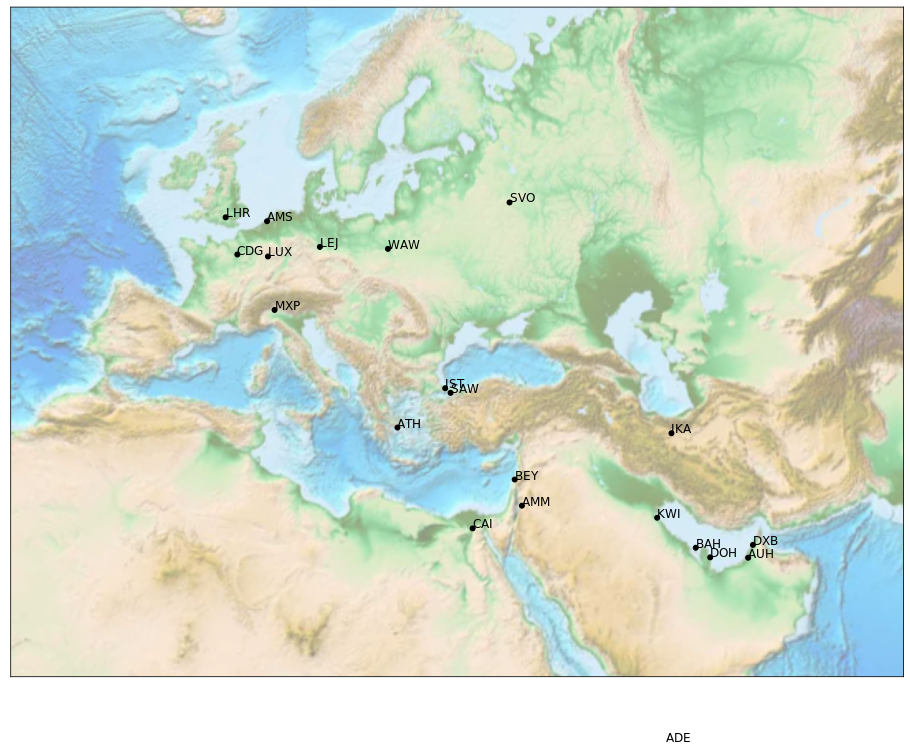

In [ ]:
#fig = plt.figure(figsize=(16, 16))

plt.switch_backend("cairo")


fig, gax = plt.subplots(figsize=(16,16))



m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=6E6, 
            lat_0=45, lon_0=30,)
m.etopo(scale=0.5, alpha=0.5)
#graph_draw(g, pos=pos, vertex_size=3, mplfig=gax, edge_pen_width=0.1,edge_color='red')


# Map (long, lat) to (x, y) for plotting
for i in range(0,len(Airports)):
    x, y = m(Airports['Lon'][i], Airports['Lat'][i])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, Airports['Name'][i], fontsize=12);
fig.savefig("graph.pdf")


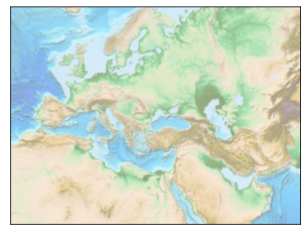

In [ ]:

x=[1,2,3]
y=[1,2,3]
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=6E6, 
            lat_0=45, lon_0=30,)
m.etopo(scale=0.5, alpha=0.5)
m.plot(x,y)
# Map (long, lat) to (x, y) for plotting
#for i in range(0,len(Airports)):
 #   x, y = m(Airports['Lon'][i], Airports['Lat'][i])
  #  plt.plot(x, y, 'ok', markersize=5)
   # plt.text(x, y, Airports['Name'][i], fontsize=12);

